<a href="https://colab.research.google.com/github/gourjyotsana/Mobile-Price-Prediction-Classification-ProjectCapston-Pe/blob/main/Classification_Capstone_Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict theactual price but a price range indicating how high the price is.**





#**Loading Dataset and Importing Modules**

In [2]:
# Importing necessary libraries for visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all models from sklearn to be used in our model building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

In [4]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

#**Reading the Dataset**

In [5]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load the dataset from drive 
mobile_df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

#**Understand More About The Data**

In [7]:
#top five rows of data
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
#bottom five rows of data
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
#shape of the data
mobile_df.shape

(2000, 21)

In [10]:
#getting all the columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not

* Fc - Front Camera mega pixels

* Four_g - Has 4G or not

* Int_memory - Internal Memory in Gigabytes

* M_dep - Mobile Depth in cm

* Mobile_wt - Weight of mobile phone

* N_cores - Number of cores of processor

* Pc - Primary Camera mega pixels

* Px_height - Pixel Resolution Height

* Px_width - Pixel Resolution Width

* Ram - Random Access Memory in Mega Bytes

* Sc_h - Screen Height of mobile in cm

* Sc_w - Screen Width of mobile in cm

* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [11]:
#checking details of dataset
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
#Looking for the description of the dataset to get insights of the data
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Summary

*   The dataset has 21 features and 2,000 rows in total.
*   The last column is given the target variable to work our models up on.
*   There is no data in any datatype except float and integer.
*   This dataset contains a mix of categorical, continuous and discrete data.
*   All the categorical variables are pre-encoded which saves a lot of our time.


#**Exploratory Data Analysis Of The Data Set**

#Distribution of price range

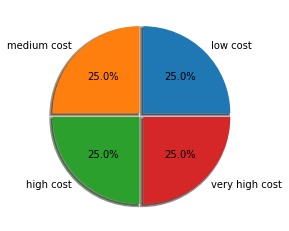

In [13]:
#We'll see the distribution of price range over all the variables using a piechart
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = mobile_df['price_range'].value_counts().values
explode = (0.03,0.03,0.03,0.03)
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=360, labeldistance=1.1, wedgeprops = {'linewidth': 3})
plt.show()



So, there are mobile phones in 4 price ranges. The number of elements is almost similar

#Analysing Categorical Feature of the data

In [14]:
#Categorical features of data
cat_list=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

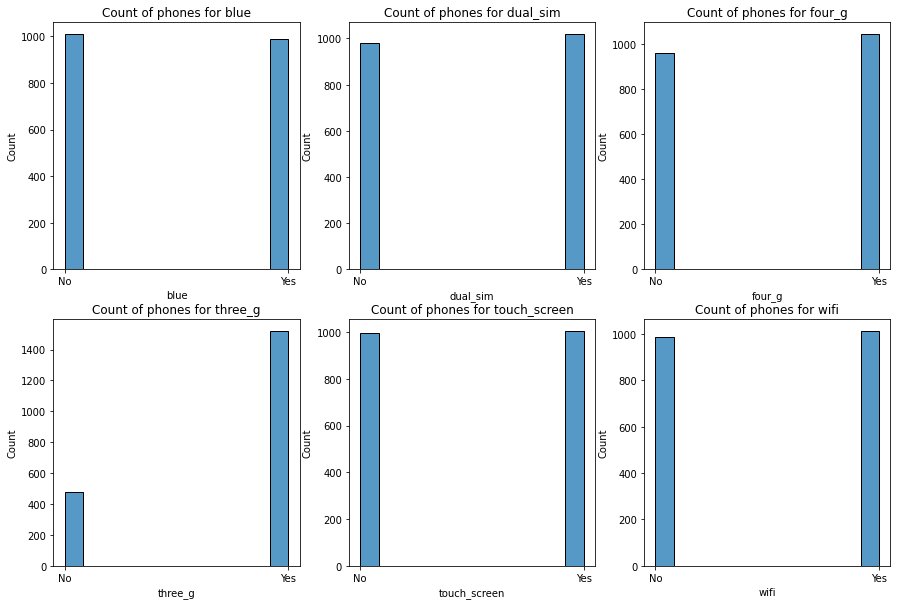

In [15]:
# visualizing the count of each by running a for loop
plt.figure(figsize=(15,10))
for index,item in enumerate(cat_list):
  plt.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt.xticks(xtick,label)
  sns.histplot(mobile_df[item])
  plt.title(f'Count of phones for {item}')

#**Observations**-

* Number of phones with **Bluetooth** is equal to number of phones that don't have Bluetooth.
*  Number of phones with **Dual Sim** is equal to number of phones that don't have Dual Sim.
* Number of phones with **4G** is equal to number of phones that don't have 4G.
* Number of phones with **3G** is more than the number of phones that don't have 3G.
*  Number of phones with **Touch Screen** is equal to number of phones that don't have Touch Screen.
* Number of phones with **Wifi** is equal to number of phones that don't have Wifi.

#Analysing Continous Feature of the data

In [16]:
con_list = ['clock_speed','fc','mobile_wt','int_memory','talk_time','sc_h','sc_w', 'm_dep']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

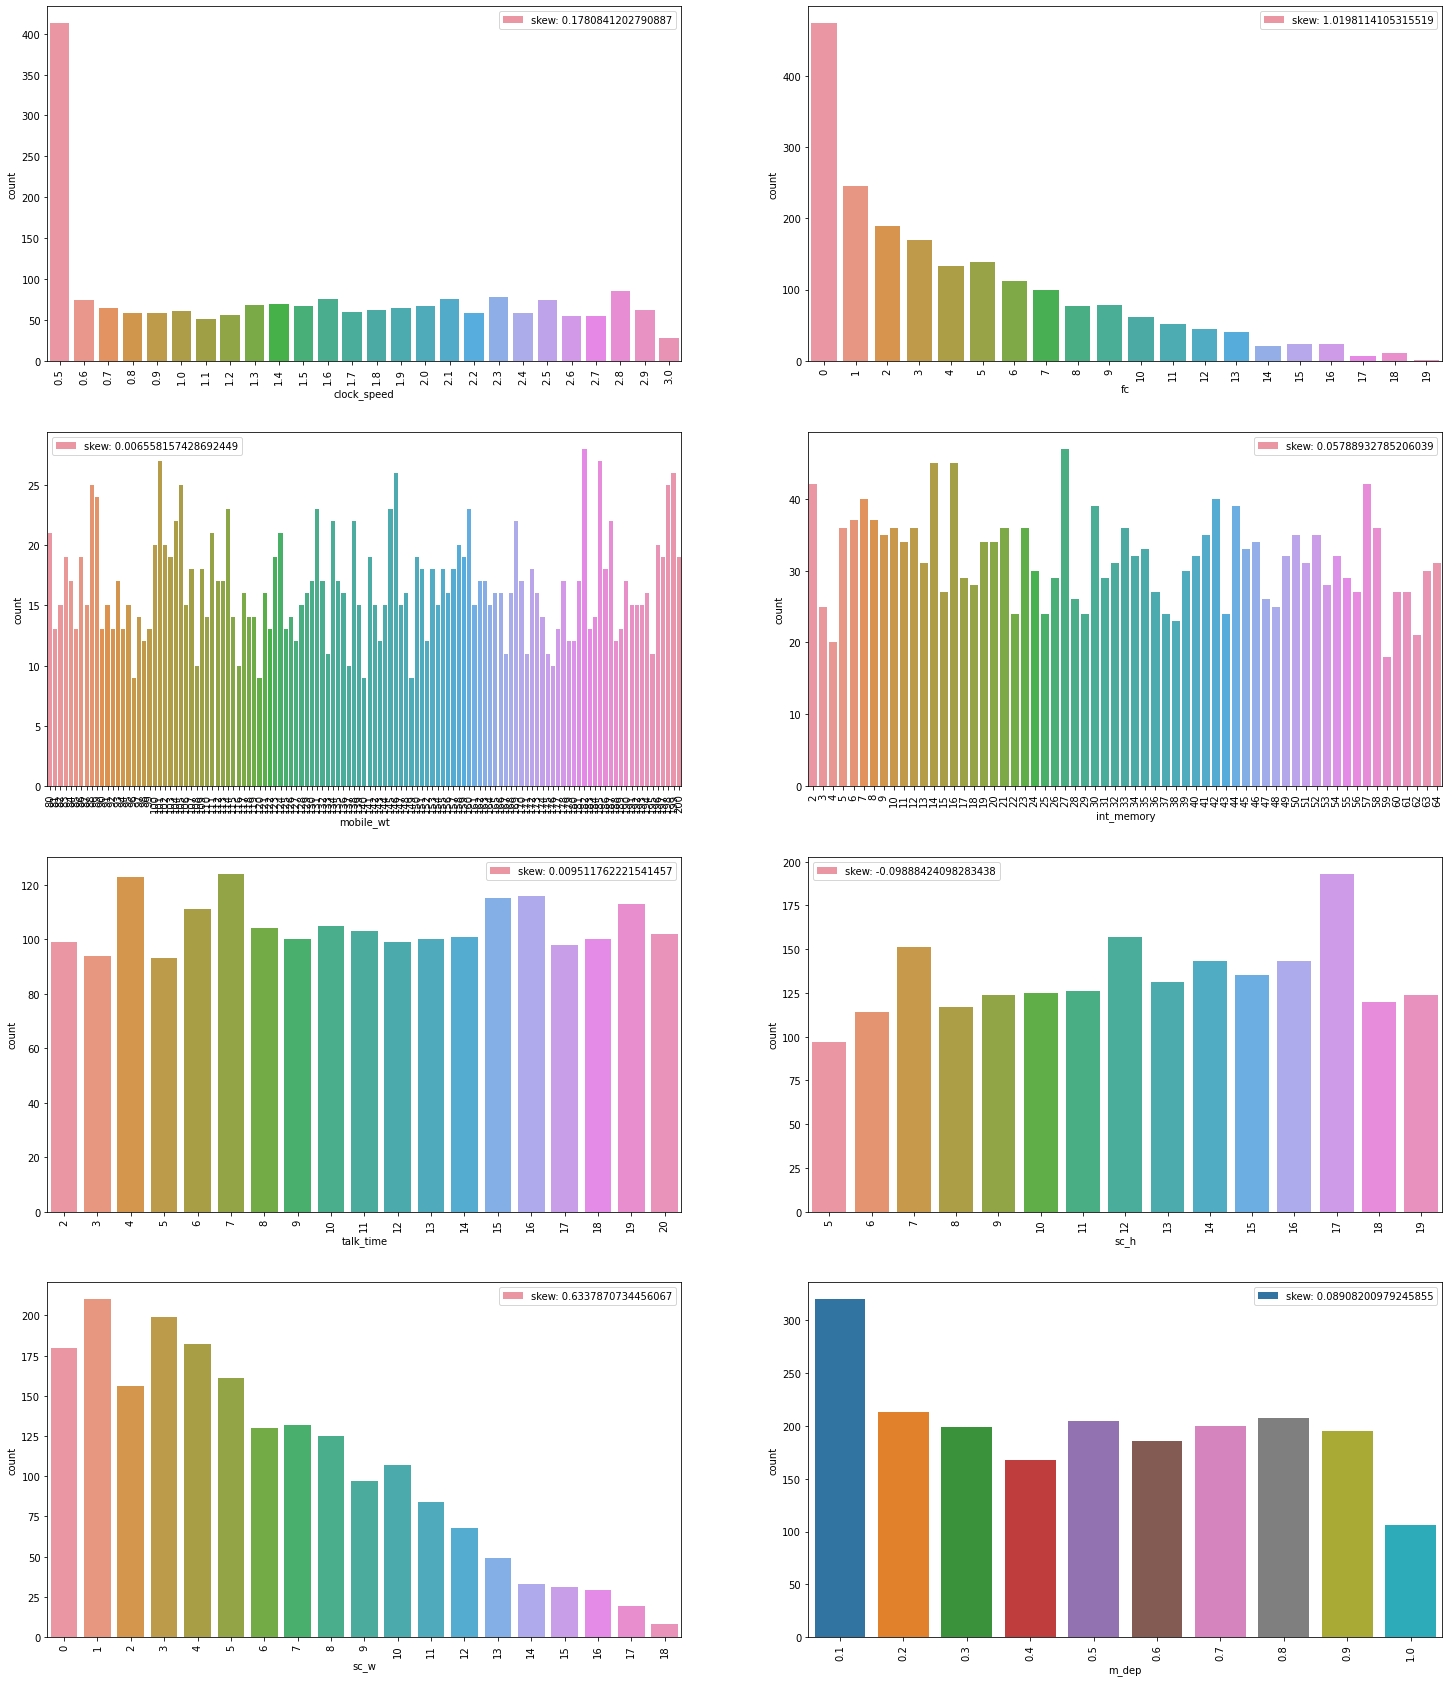

In [17]:
c= 1
plt.figure(figsize = (25,30))
for i in con_list:
    plt.subplot(4,2,c)
    c=c+1
    sns.countplot(mobile_df[i])
    
    plt.legend(['skew: '+str(mobile_df[i].skew())])
    plt.xticks(rotation=90)

#**Observations**
* The **clock speed** with 0.5ghz is most popular.
* The phones with higher megapixeled **camera** doesn't show a great relevance amongst the customers.
* There is a varitey of range available in **mobile wight and internal memory**.
* **Talk Time** of 7 is higher in demand.
* **Screen Height** of 17cm is more in demand.
* Phones with more **Screen Width** is less in demand.
* **Mobile Depth** of 0.1 cm is more in demand.

#Analysing Discrete Feature of the data

In [18]:
#Discrete features of data
dis_list = ['battery_power','px_height','px_width','ram']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

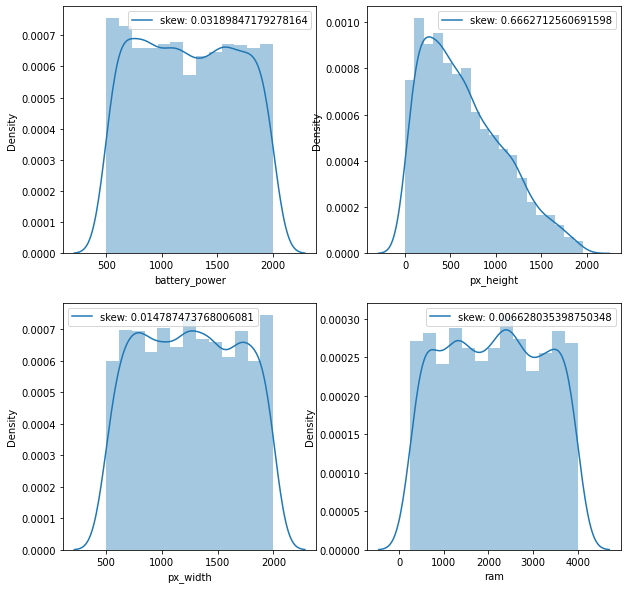

In [19]:
c= 1
# visualizing the count of each by running a for loop
plt.figure(figsize = (10,10))
for i in dis_list:
    plt.subplot(2,2,c)
    c=c+1
    sns.distplot(mobile_df[i])
    plt.legend(['skew: '+str(mobile_df[i].skew())])

#**Observations**

The count of phones is equally distributed among all the parameters in **Battery Power**.

The number of phones tends to decrease as we go higher in **pixel height**, as we can say that the graph is positively skewed.

The count of phones is equally distributed among all the parameters in **px_width**.

The count of phones is equally distributed among all the parameters in **Ram**


#Ram vs Price Range

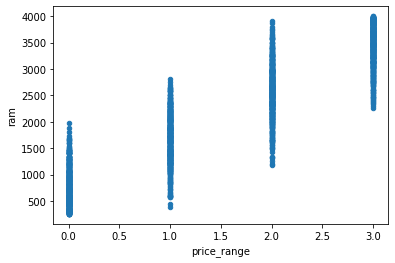

In [20]:
#@title Default title text
#plot of ram and price range
mobile_df.plot(x = 'price_range',y = 'ram',kind = 'scatter')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost

#Finding Correlation in the data

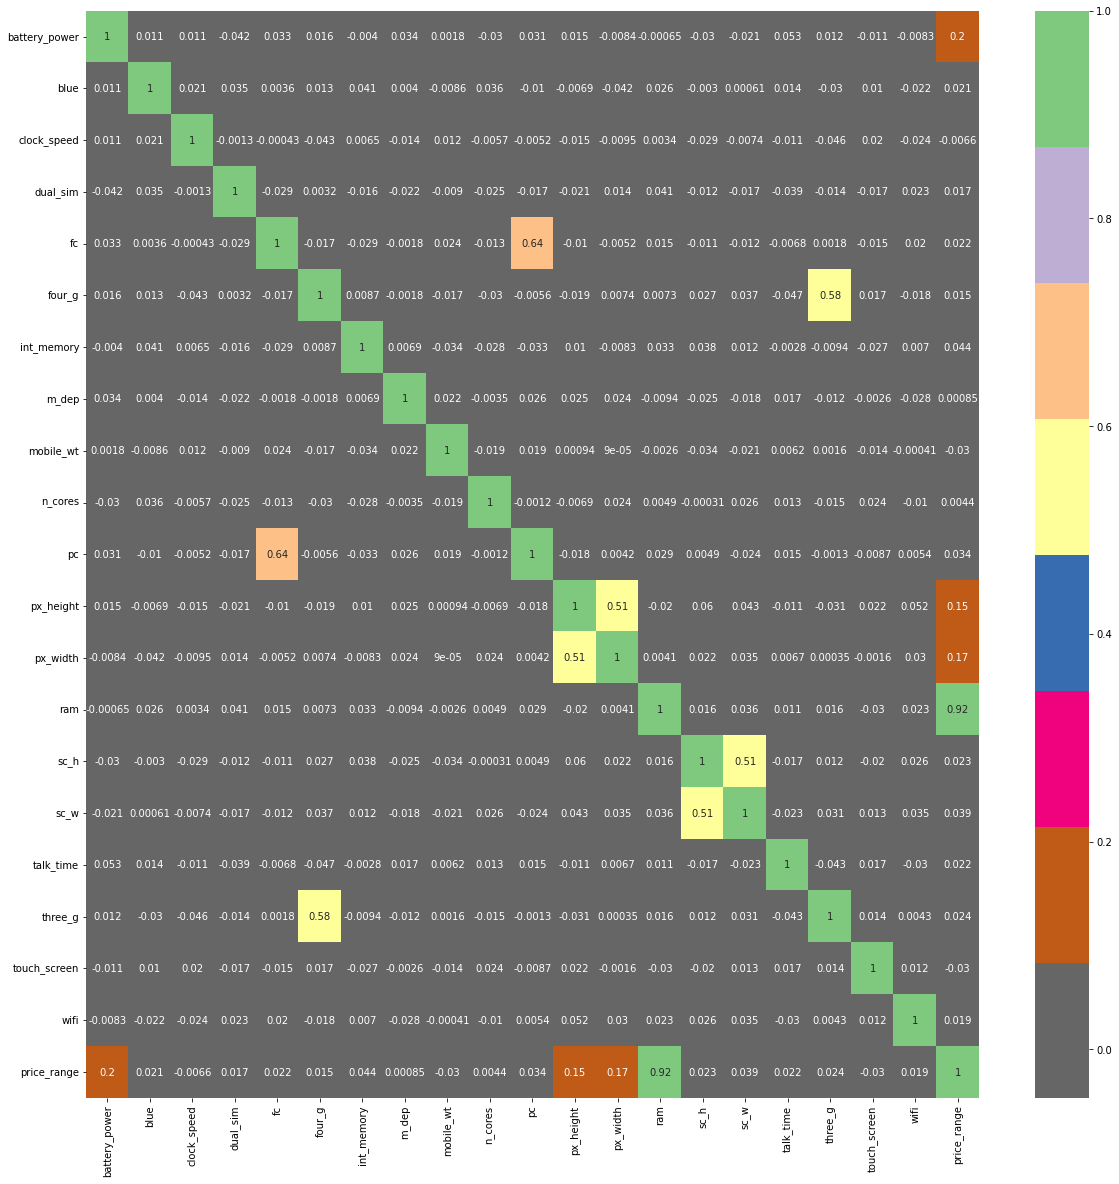

In [21]:
#plotting correlation heatmap 
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(mobile_df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()


## Observations:

1.   pc is correlated with fc.
2.   3g and 4g are moderately correlated.
3.   sc_h and sc_w are moderately correlated. We will try to change them into a single variable.
4.   px_width and px_height are moderately correlated. We will try to change them into a single variable.
5.   ram is highly correlated with our price range. May be one the most important factor in determining the price.




#**Cleaning the data**

#Checking the missing values of data

In [22]:
#null values of data
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We do not have any missing and null values in the data.

#Looking for outliers

In [23]:
#outliers
q1 = mobile_df.quantile(0.25)
q3 = mobile_df.quantile(0.75)
IQR = q3 - q1

((mobile_df < (q1 - 1.5 * IQR)) | (mobile_df> (q3 + 1.5 * IQR))).sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          477
touch_screen       0
wifi               0
price_range        0
dtype: int64

As we have outliers in **fc and three_g** column.we have to remove it otherwise it will affect our classification model.

In [24]:
#removing outliers
for value in['fc','three_g']:
  q1 = mobile_df[value].quantile(0.25)
  q3 = mobile_df[value].quantile(0.75)
  IQR = q3 - q1

  mobile_df[value]=np.where(mobile_df[value]<(q1 - 1.5 * IQR),(q1 - 1.5 * IQR),np.where(mobile_df[value]>(q3 + 1.5 * IQR),(q3 + 1.5 * IQR),mobile_df[value]))

In [25]:
#Checking outliers
q1 = mobile_df.quantile(0.25)
q3 = mobile_df.quantile(0.75)
IQR = q3 - q1

((mobile_df < (q1 - 1.5 * IQR)) | (mobile_df> (q3 + 1.5 * IQR))).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        2
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Now we can proceed with our data as its have no outliers.

#**Feature Selection**

In [26]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [27]:
#Drpping irrelevant feature from our data
mobile_df.drop(columns = ['blue','clock_speed','dual_sim','four_g','m_dep','three_g','touch_screen','wifi'],inplace = True)

In [28]:
mobile_df.head()

,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,1.0,7,188,2,2,20,756,2549,9,7,19,1
1,1021,0.0,53,136,3,6,905,1988,2631,17,3,7,2
2,563,2.0,41,145,5,6,1263,1716,2603,11,2,9,2
3,615,0.0,10,131,6,9,1216,1786,2769,16,8,11,2
4,1821,13.0,44,141,2,14,1208,1212,1411,8,2,15,1


#Defining dependent and independent features

In [29]:
#Independent and dependent variable
X = mobile_df.drop('price_range',axis=1)
y =mobile_df['price_range']

#**Train Test Spilt**

In [30]:
# Appying the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20,random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 12)
(400, 12)
(1600,)
(400,)


#**Scaling the data**

In [31]:
#Scaling the data using Standard Scaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#**Predictive Modelling**

Algorithms and methods to be used to apply predictive modelling--

* Decision Tree Classifier

* Random Forest Classifier 

* Gradient Boosting Classifier 
* XGBoost Classifier 

* K-Nearest Neighbours 

#Decision Tree Classifier

In [32]:
#Implimenting decision tree
tree_classify=DecisionTreeClassifier()
tree_classify.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = tree_classify.predict(X_test)

In [34]:
y_pred_train = tree_classify.predict(X_train)

In [35]:
accuracy_score(y_test, y_pred)

0.8425

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.81      0.76      0.78       100
           2       0.76      0.85      0.80       100
           3       0.94      0.84      0.89       100

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [37]:
class_names = ['low price','medium price', 'high price', 'very high price']

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


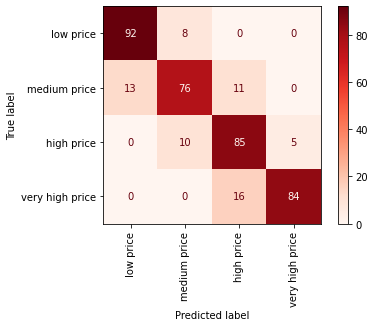

In [38]:
#Visualising the confusion matrix 
plot_confusion_matrix(tree_classify, X_test, y_test, cmap=plt.cm.Reds, display_labels=class_names, xticks_rotation='vertical')
plt.show()

## Observations:

1.   The overall accuracy score on our test data is **83%**.
2.   Prediction accuracy on class 1 (Low Cost) is **92%**.
3.   Prediction accuracy on class 2 (Medium Cost) is **76%**.
4.   Prediction accuracy on class 3 (High Cost) is **80%**.
5.   Prediction accuracy on class 4 (Low Cost) is **89%**.

As a result, we can see that the Decision Tree Classifier has performed good overall, and best in **class 1**.









##Hyperparameter tuning with Decision Tree

In [39]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['accuracy']

In [40]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy', scoring=['accuracy'])

In [41]:
#calling an best params
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [42]:
#calling an best score
tree_cv.best_score_

0.8400000000000001

The overall test accuracy in case of hyperparameter tuning on Decision tree has been increse by 1%

## Random Forest Classifier

In [43]:
random_forest= RandomForestClassifier(n_estimators=150)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [44]:
y_pred = random_forest.predict(X_test)

In [45]:
y_pred_train = random_forest.predict(X_train)

In [46]:
accuracy_score(y_test, y_pred)

0.8975

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.86      0.90      0.88        91
           2       0.82      0.84      0.83        92
           3       0.93      0.90      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


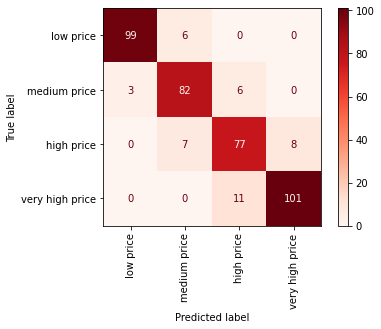

In [48]:
#Confusion matrix of random forest
plot_confusion_matrix(random_forest, X_test, y_test, cmap=plt.cm.Reds, display_labels=class_names, xticks_rotation='vertical')
plt.show()

### Observations:

1.   The overall accuracy score on our test data is **90%**.
2.   Prediction accuracy on class 1 (Low Cost) is **100%**.
3.   Prediction accuracy on class 2 (Medium Cost) is **86%**.
4.   Prediction accuracy on class 3 (High Cost) is **80%**.
5.   Prediction accuracy on class 4 (Low Cost) is **97%**. 

As a result, we can see that the Random Forest Classifier has performed good overall, and best in class 4.









Random Forest tends to overfit.

### Hyperparameter tuning with Random forest

In [49]:
params = {'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None]
          }

In [50]:
random_forest = RandomForestClassifier()
clsr = GridSearchCV(random_forest, params, scoring='accuracy', cv=5)
clsr.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 40],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy')

In [51]:
clsr.best_params_

{'max_depth': 40,
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 500}

In [52]:
clsr.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=500)

In [53]:
clsr.best_score_

0.9005000000000001



Our best parameters are:

max_depth = 40,

max_leaf_nodes = None,

min_samples_split = 2,

n_estimators = 500

#Gradient Boosting Classifier

In [54]:
#Implimenting gradient boosting classifier
grad_boost = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1)

In [55]:
#Fitting gradient boosting
grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=300)

In [56]:
y_pred_train = grad_boost.predict(X_train)
y_pred = grad_boost.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.9225

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.93      0.91        91
           2       0.88      0.87      0.87        92
           3       0.95      0.92      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


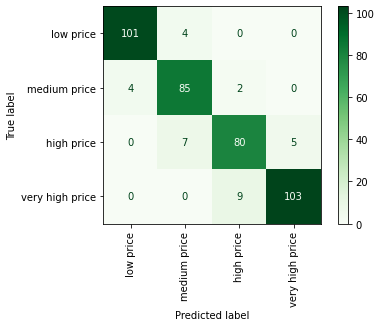

In [59]:
#confusion matrix
plot_confusion_matrix(grad_boost, X_test, y_test, cmap=plt.cm.Greens, display_labels=class_names, xticks_rotation='vertical')
plt.show()

### Observations:

1.   The overall accuracy score on our test data is **92%**.
2.   Prediction accuracy on class 1 (Low Cost) is **100%**.
3.   Prediction accuracy on class 2 (Medium Cost) is **84%**.
4.   Prediction accuracy on class 3 (High Cost) is **80%**.
5.   Prediction accuracy on class 4 (Low Cost) is **100%**.

As a result, we can see that the Gradient Boosting Classifier has performed good overall, and best in class 1 & class 4.


#XG Boost

In [60]:
#Implimenting xg boosting
x_g_boost = XGBClassifier(n_estimators=300)
x_g_boost.fit(X_train, y_train)

XGBClassifier(n_estimators=300, objective='multi:softprob')

In [61]:
y_pred = x_g_boost.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.9125

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.86      0.86      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


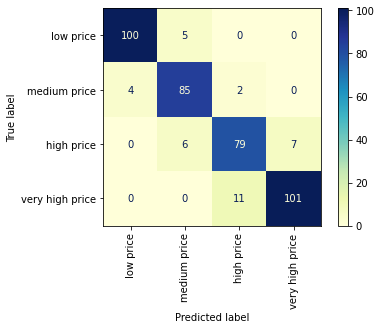

In [64]:
#Confusion matrix
plot_confusion_matrix(x_g_boost, X_test, y_test, cmap=plt.cm.YlGnBu, display_labels=class_names, xticks_rotation='vertical')
plt.show()

## Observations:

1.   The overall accuracy score on our test data is **91%**.
2.   Prediction accuracy on class 1 (Low Cost) is **100%**.
3.   Prediction accuracy on class 2 (Medium Cost) is **85%**.
4.   Prediction accuracy on class 3 (High Cost) is **79%**.
5.   Prediction accuracy on class 4 (Low Cost) is **100%**. 

As a result, we can see that the XG Boost Classifier has performed good overall, and best in class 1 & class 4.








#K-Nearest Neighbours

In [65]:
# Applying the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [66]:
# Predictions on the train and test data
y_test_knn=knn.predict(X_test)
y_train_knn=knn.predict(X_train)

In [67]:
test_accu1=accuracy_score(y_test,y_test_knn)
train_accu1=accuracy_score(y_train,y_train_knn)

In [68]:
print('Train Accuracy Score:',train_accu1)
print('Test Accuracy Score:',test_accu1)

Train Accuracy Score: 0.9475
Test Accuracy Score: 0.93


In [69]:
# Here, we find the classification report
print(classification_report(y_test,y_test_knn))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.90      0.95      0.92        91
           2       0.85      0.91      0.88        92
           3       1.00      0.88      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


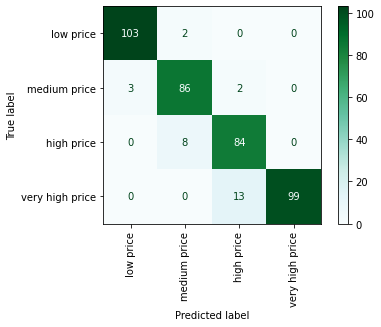

In [70]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.BuGn, display_labels=class_names, xticks_rotation='vertical')
plt.show()

## Observations:

1.   The overall accuracy score on our test data is 93%.
2.   Prediction accuracy on class 1 (Low Cost) is 100%.
3.   Prediction accuracy on class 2 (Medium Cost) is 86%.
4.   Prediction accuracy on class 3 (High Cost) is 84%.
5.   Prediction accuracy on class 4 (Low Cost) is 99%. As a result, we can see that the Gradient Boosting Classifier has performed good overall, and best in class 1.








## Conclusion

The Models used for this Classsification problem are

* Decision Tree Model
* Random Forest Model
* Gradient Boosting
* XG Boost
* K-Nearest Neighbor Model

We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model.To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

K-Nearest Neighbours has the best overall accuracy of 93 percent.

The optimal accuracy for Random Forest, Decision Tree, Gradient Boosting, and XG boost was 90 percent, 83 percent, 92 percent, and 91 percent, respectively.

However, we'll make XG boost our best model because it provides good overall and individual class accuracy.